In [1]:
%pip install fastf1

  Obtaining dependency information for fastf1 from https://files.pythonhosted.org/packages/2c/94/5f27563673a825fb89714cb6c3dca058dba076f12e30ab8269045615b3a0/fastf1-3.1.6-py3-none-any.whl.metadata
  Obtaining dependency information for requests-cache>=0.8.0 from https://files.pythonhosted.org/packages/12/67/9ee2d8d8cca30f2cdc1048a4cd7dac10db2b49ec1eeca31f15a0160b71a0/requests_cache-1.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for thefuzz from https://files.pythonhosted.org/packages/19/7d/ca50835332895beb87e663f9a610a7e0a7335b69e31177aee87acc3db9bd/thefuzz-0.20.0-py3-none-any.whl.metadata
  Obtaining dependency information for timple>=0.1.6 from https://files.pythonhosted.org/packages/73/d9/28f2a2dc747e388b9b05e04bd8a54c81c0984a73b0ee05e44b2353322417/timple-0.1.7-py3-none-any.whl.metadata
  Obtaining dependency information for cattrs>=22.2 from https://files.pythonhosted.org/packages/b3/0d/cd4a4071c7f38385dc5ba91286723b4d1090b87815db48216212c6c6c30e/cattrs-23.2.3-p

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.preprocessing
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error

In [60]:
data = pd.read_csv('/kaggle/input/f1-weather/mlp_data_final.csv')

In [61]:
data.head()

,Unnamed: 0,Event,LapTime,NextLapTime,LapNumber,Year,DriverNumber,Team,Compound,TyreLife,...,SpeedFL,SpeedST,IsPersonalBest,Position,Deleted,TrackStatus,Temp,Humidity,Pressure,WindSpeed
0,0,Melbourne,105.008,91.585,1.0,2019,10,0,2,1.0,...,289.0,212.0,0,17.0,0,2,23.477869,70.453279,1015.334426,1.166393
1,1,Melbourne,91.585,91.406,2.0,2019,10,0,2,2.0,...,289.0,270.0,0,16.0,0,1,23.477869,70.453279,1015.334426,1.166393
2,2,Melbourne,91.406,92.361,3.0,2019,10,0,2,3.0,...,307.0,283.0,0,16.0,0,1,23.477869,70.453279,1015.334426,1.166393
3,3,Melbourne,92.361,91.171,4.0,2019,10,0,2,4.0,...,291.0,293.0,0,16.0,0,1,23.477869,70.453279,1015.334426,1.166393
4,4,Melbourne,91.171,91.020,5.0,2019,10,0,2,5.0,...,303.0,292.0,0,16.0,0,1,23.477869,70.453279,1015.334426,1.166393


In [62]:
data.columns

Index(['Unnamed: 0', 'Event', 'LapTime', 'NextLapTime', 'LapNumber', 'Year',
       'DriverNumber', 'Team', 'Compound', 'TyreLife', 'FreshTyre', 'S1Time',
       'S2Time', 'S3Time', 'S1STime', 'S2STime', 'S2STime.1', 'SpeedI2',
       'SpeedFL', 'SpeedST', 'IsPersonalBest', 'Position', 'Deleted',
       'TrackStatus', 'Temp', 'Humidity', 'Pressure', 'WindSpeed'],
      dtype='object')

In [63]:
device = 'cuda'

In [64]:
data = data.dropna()

In [67]:
data.head()

,Unnamed: 0,Event,LapTime,NextLapTime,LapNumber,Year,DriverNumber,Team,Compound,TyreLife,...,SpeedFL,SpeedST,IsPersonalBest,Position,Deleted,TrackStatus,Temp,Humidity,Pressure,WindSpeed
1,1,Melbourne,91.585,91.406,2.0,2019,10,0,2,2.0,...,289.0,270.0,0,16.0,0,1,23.477869,70.453279,1015.334426,1.166393
2,2,Melbourne,91.406,92.361,3.0,2019,10,0,2,3.0,...,307.0,283.0,0,16.0,0,1,23.477869,70.453279,1015.334426,1.166393
5,5,Melbourne,91.020,91.165,6.0,2019,10,0,2,6.0,...,307.0,297.0,0,16.0,0,1,23.477869,70.453279,1015.334426,1.166393
6,6,Melbourne,91.165,91.434,7.0,2019,10,0,2,7.0,...,307.0,291.0,0,16.0,0,1,23.477869,70.453279,1015.334426,1.166393
7,7,Melbourne,91.434,91.161,8.0,2019,10,0,2,8.0,...,303.0,299.0,0,16.0,0,1,23.477869,70.453279,1015.334426,1.166393


In [70]:
le = LabelEncoder()
data["Event"] = le.fit_transform(data['Event'])

In [126]:

X = (data.loc[:, data.columns != 'NextLapTime']).to_numpy()
Y = (data.loc[:, data.columns == 'NextLapTime']).to_numpy()

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y.ravel(), test_size=0.2, shuffle=True,)
X_train, X_eval, Y_train, Y_eval = sklearn.model_selection.train_test_split(X_train, Y_train, test_size=0.25, shuffle=True,)

scaler = StandardScaler()

# Fit on training set only
X_train = scaler.fit_transform(X_train)

# Apply transform to both the training set and the test set
X_test = scaler.transform(X_test)

X_eval = scaler.transform(X_eval)

# Convert arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(Y_train, dtype=torch.float32).view(-1, 1).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(Y_test, dtype=torch.float32).view(-1, 1).to(device)
X_eval = torch.tensor(X_eval, dtype=torch.float32).to(device)
y_eval = torch.tensor(Y_eval, dtype=torch.float32).view(-1, 1).to(device)


train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=2048, shuffle=True)

In [147]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden, output_size, dropout_rate=0.2):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden)
        self.relu1 = nn.ReLU()
        self.batch_norm1 = nn.BatchNorm1d(hidden)
        self.dropout1 = nn.Dropout(dropout_rate)  # Dropout layer after batch normalization
        self.layer2 = nn.Linear(hidden, hidden)
        self.relu2 = nn.ReLU()
        self.batch_norm2 = nn.BatchNorm1d(hidden)
        self.dropout2 = nn.Dropout(dropout_rate)  # Dropout layer after batch normalization
        # Repeat this pattern for additional layers
        self.layer3 = nn.Linear(hidden, hidden)
        self.relu3 = nn.ReLU()
        self.batch_norm3 = nn.BatchNorm1d(hidden)
        self.dropout3 = nn.Dropout(dropout_rate)  # Dropout layer after batch normalization
        self.layer4 = nn.Linear(hidden, hidden)
        self.relu4 = nn.ReLU()
        self.batch_norm4 = nn.BatchNorm1d(hidden)
        self.dropout4 = nn.Dropout(dropout_rate)  # Dropout layer after batch normalization
        self.layer5 = nn.Linear(hidden, hidden)
        self.relu5 = nn.ReLU()
        self.batch_norm5 = nn.BatchNorm1d(hidden)
        self.dropout5 = nn.Dropout(dropout_rate)  # Dropout layer after batch normalization
        self.layer6 = nn.Linear(hidden, hidden)
        self.relu6 = nn.ReLU()
        self.batch_norm6 = nn.BatchNorm1d(hidden)
        self.dropout6 = nn.Dropout(dropout_rate)  # Dropout layer after batch normalization
        self.layer7 = nn.Linear(hidden, hidden)
        self.relu7 = nn.ReLU()
        self.batch_norm7 = nn.BatchNorm1d(hidden)
        self.dropout7 = nn.Dropout(dropout_rate)  # Dropout layer after batch normalization
        self.layer8 = nn.Linear(hidden, hidden)
        self.relu8 = nn.ReLU()
        self.batch_norm8 = nn.BatchNorm1d(hidden)
        self.dropout8 = nn.Dropout(dropout_rate)  # Dropout layer after batch normalization
        self.output_layer = nn.Linear(hidden, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.batch_norm1(x)
        x = self.dropout1(x)  # Apply dropout after batch normalization
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.batch_norm2(x)
        x = self.dropout2(x)  # Apply dropout after batch normalization
        # Repeat this pattern for additional layers
        x = self.layer3(x)
        x = self.relu3(x)
        x = self.batch_norm3(x)
        x = self.dropout3(x)  # Apply dropout after batch normalization
        x = self.layer4(x)
        x = self.relu4(x)
        x = self.batch_norm4(x)
        x = self.dropout4(x)  # Apply dropout after batch normalization
        x = self.layer5(x)
        x = self.relu5(x)
        x = self.batch_norm5(x)
        x = self.dropout5(x)  # Apply dropout after batch normalization
        x = self.layer6(x)
        x = self.relu6(x)
        x = self.batch_norm6(x)
        x = self.dropout6(x)  # Apply dropout after batch normalization
        x = self.layer7(x)
        x = self.relu7(x)
        x = self.batch_norm7(x)
        x = self.dropout7(x)  # Apply dropout after batch normalization
        x = self.layer8(x)
        x = self.relu8(x)
        x = self.batch_norm8(x)
        x = self.dropout8(x)
        return self.output_layer(x)


In [148]:
# Model initialization
input_size = X_train.shape[1]  # Number of input features
hidden = 256
output_size = 1  # For regression, the output size is typically 1

model = MLP(input_size, hidden, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

In [149]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

epochs = 1000
train_losses = []
test_losses = []
test_accuracies = []  # Store test accuracy (MAE) for each epoch

# Training Loop with Test Evaluation for Loss and Accuracy
for epoch in range(epochs):
    model.train()
    model.to(device)
    running_loss = 0.0

    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test).item()
        test_losses.append(test_loss)

        # Calculate and store test accuracy (MAE)
        test_accuracy = mean_squared_error(y_test.cpu().numpy(), test_outputs.cpu().numpy(), squared=False)
        test_accuracies.append(test_accuracy)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {test_loss:.4f}, Test RMSE: {test_accuracy:.4f}")


Epoch [1/1000], Train Loss: 8192.0671, Test Loss: 8105.3452, Test RMSE: 90.0297
Epoch [2/1000], Train Loss: 7697.1930, Test Loss: 7153.0303, Test RMSE: 84.5756
Epoch [3/1000], Train Loss: 6473.8350, Test Loss: 5532.5435, Test RMSE: 74.3811
Epoch [4/1000], Train Loss: 4728.4832, Test Loss: 3751.3721, Test RMSE: 61.2484
Epoch [5/1000], Train Loss: 2941.0499, Test Loss: 2091.4622, Test RMSE: 45.7325
Epoch [6/1000], Train Loss: 1511.5507, Test Loss: 950.0250, Test RMSE: 30.8225
Epoch [7/1000], Train Loss: 636.0468, Test Loss: 349.7055, Test RMSE: 18.7004
Epoch [8/1000], Train Loss: 229.1024, Test Loss: 102.9916, Test RMSE: 10.1485
Epoch [9/1000], Train Loss: 91.3457, Test Loss: 41.5709, Test RMSE: 6.4475
Epoch [10/1000], Train Loss: 56.0388, Test Loss: 22.2055, Test RMSE: 4.7123
Epoch [11/1000], Train Loss: 47.9657, Test Loss: 20.6499, Test RMSE: 4.5442
Epoch [12/1000], Train Loss: 46.1633, Test Loss: 19.1087, Test RMSE: 4.3713
Epoch [13/1000], Train Loss: 44.8893, Test Loss: 19.3412, Test

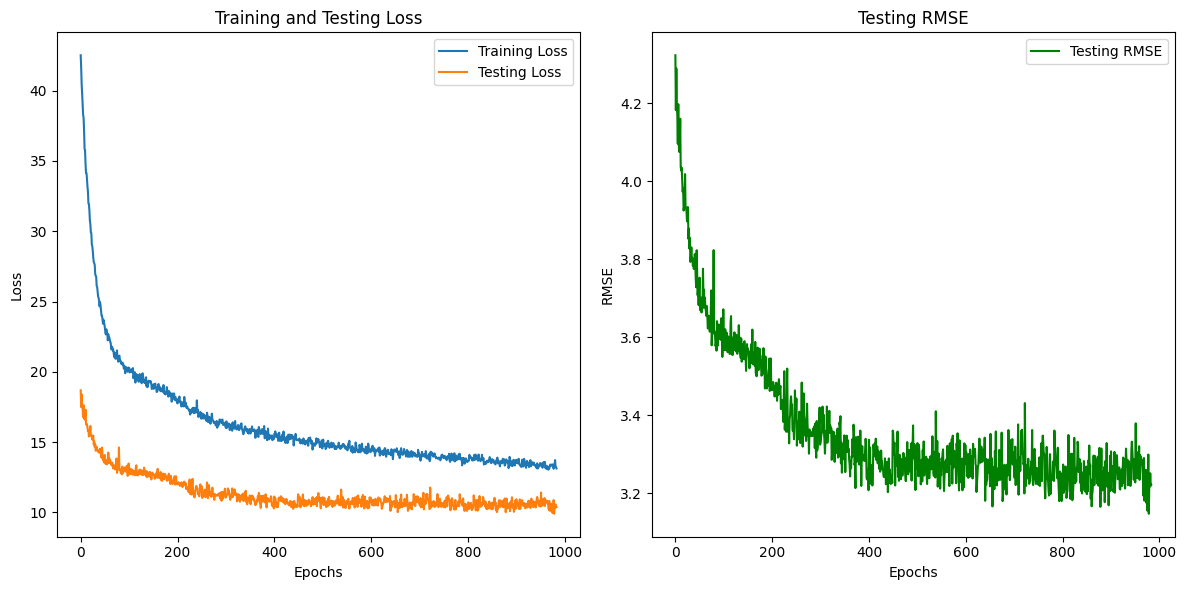

In [151]:
# Plotting Training Loss, Testing Loss, and Testing Accuracy (MAE)
plt.figure(figsize=(12, 6))

# Loss Plots
plt.subplot(1, 2, 1)
plt.plot(train_losses[15:-1], label='Training Loss')
plt.plot(test_losses[15:-1], label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(test_accuracies[15:-1], label='Testing RMSE', color='green')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Testing RMSE')
plt.legend()

plt.tight_layout()
plt.savefig("MLPMaxFinal.png")
plt.show()


In [156]:
# Validation dataset

y_ev_pred = model(X_eval)
eval_accuracy = mean_squared_error(y_eval.cpu().numpy(), y_ev_pred.detach().cpu().numpy(), squared=False)
print(eval_accuracy)


3.3002262
